# EDA Notebook Test

## 2nd Feb 1:46PM PST - NOTE from Mick : This is an exploratory notebook to try and figure out which fields are most filled and which countries are filling out the survey the most 

This notebook seems to only work on the Colab Pro instance with High Memory

I believe this is because the CSV file is 2.6GB and it generateds a very large 5-6GB pandas dataframe.

If restricting the columns loaded it will probably work on Colab Free. Colab Pro is $9.99 per month so I just bought a month of credits.

I am using this for practicew before starting using SageMaker because

a) It costs more in AWS credits
b) I had to use a much larger instance type in SageMaker to make it work

In [46]:
import boto3
import pandas as pd
import os

# Define local file path
local_file_path = "merged_data_local.csv"  # Change as needed

# Define S3 details
bucket_name = "sagemaker-us-west-2-986030204467"
file_key = "capstone/testfiles/PISA_2022_Background_questionnaire_edited.csv"

# AWS credentials are usually stored in ~/.aws/credentials or IAM roles (if running on AWS services)
s3_client = boto3.client("s3")

# Read the file from S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

columns_to_read_full = [
    "MATH_Proficient", "CNT", "CNTRYID", "CNTSCHID", "CNTSTUID", "SISCO", "ST347Q01JA", "ST347Q02JA",
    "ST349Q01JA", "ST350Q01JA", "ST356Q01JA", "ST322Q01JA", "ST322Q02JA", "ST322Q03JA", "ST322Q04JA",
    "ST322Q06JA", "ST322Q07JA", "DURECEC", "EFFORT1", "EFFORT2", "ST259Q01JA", "WB164Q01HA", "HOMEPOS",
    "ST004D01T", "GRADE", "REPEAT", "EXPECEDU", "ICTAVSCH", "ICTAVHOM", "ICTDISTR", "IMMIG", "LANGN",
    "TARDYSD", "ST226Q01JA", "ST016Q01NA", "MISSSC", "Option_UH", "OECD", "PAREDINT", "BMMJ1", "BFMJ2",
    "WB163Q06HA", "WB163Q07HA", "ST230Q01JA", "SKIPPING", "IC180Q01JA", "IC180Q08JA", "ST059Q02JA",
    "ST296Q04JA", "WB176Q01HA", "STUDYHMW", "IC184Q01JA", "IC184Q02JA", "IC184Q03JA", "IC184Q04JA",
    "ST059Q01TA", "ST296Q01JA", "ST272Q01JA", "ST268Q01JA", "ST268Q04JA", "ST268Q07JA", "ST293Q04JA",
    "ST297Q01JA", "ST297Q03JA", "ST297Q05JA", "ST297Q06JA", "ST297Q07JA", "ST297Q09JA", "WB165Q01HA",
    "WB166Q01HA", "WB166Q02HA", "WB166Q03HA", "WB166Q04HA", "ST258Q01JA", "ST294Q01JA", "ST295Q01JA",
    "WB150Q01HA", "WB156Q01HA", "WB158Q01HA", "WB160Q01HA", "WB161Q01HA", "WB171Q01HA", "WB171Q02HA",
    "WB171Q03HA", "WB171Q04HA", "WB172Q01HA", "WB173Q01HA", "WB173Q02HA", "WB173Q03HA", "WB173Q04HA",
    "WB177Q01HA", "WB177Q02HA", "WB177Q03HA", "WB177Q04HA", "WB032Q01NA", "WB032Q02NA", "WB031Q01NA",
    "EXERPRAC", "STUBMI", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR", "CURIOAGR",
    "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR", "INFOSEEK", "FAMSUP", "DISCLIM",
    "TEACHSUP", "COGACRCO", "COGACMCO", "EXPOFA", "EXPO21ST", "MATHEFF", "MATHEF21", "FAMCON", "ANXMAT",
    "MATHPERS", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP", "OPENART", "IMAGINE",
    "SCHSUST", "LEARRES", "PROBSELF", "FAMSUPSL", "FEELLAH", "SDLEFF", "ICTRES", "ESCS", "FLSCHOOL",
    "FLMULTSB", "FLFAMILY", "ACCESSFP", "FLCONFIN", "FLCONICT", "ACCESSFA", "ATTCONFM", "FRINFLFM",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY", "ICTWKEND",
    "ICTREG", "ICTINFO", "ICTEFFIC", "BODYIMA", "SOCONPA", "LIFESAT", "PSYCHSYM", "SOCCON", "EXPWB",
    "CURSUPP", "PQMIMP", "PQMCAR", "PARINVOL", "PQSCHOOL", "PASCHPOL", "ATTIMMP", "CREATHME", "CREATACT",
    "CREATOPN", "CREATOR", "WORKPAY", "WORKHOME"
]

columns_to_read_test = [
    "MATH_Proficient", "CNT", "CNTRYID", "CNTSCHID", "CNTSTUID", "SISCO", "WB031Q01NA"
]

columns_to_read_just_wle = [
    "MATH_Proficient", "CNT", "CNTRYID", "CNTSCHID", "CNTSTUID", "SISCO",
    "EXERPRAC", "STUBMI", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR", "CURIOAGR",
    "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR", "INFOSEEK", "FAMSUP", "DISCLIM",
    "TEACHSUP", "COGACRCO", "COGACMCO", "EXPOFA", "EXPO21ST", "MATHEFF", "MATHEF21", "FAMCON", "ANXMAT",
    "MATHPERS", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP", "OPENART", "IMAGINE",
    "SCHSUST", "LEARRES", "PROBSELF", "FAMSUPSL", "FEELLAH", "SDLEFF", "ICTRES", "ESCS", "FLSCHOOL",
    "FLMULTSB", "FLFAMILY", "ACCESSFP", "FLCONFIN", "FLCONICT", "ACCESSFA", "ATTCONFM", "FRINFLFM",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY", "ICTWKEND",
    "ICTREG", "ICTINFO", "ICTEFFIC", "BODYIMA", "SOCONPA", "LIFESAT", "PSYCHSYM", "SOCCON", "EXPWB",
    "CURSUPP", "PQMIMP", "PQMCAR", "PARINVOL", "PQSCHOOL", "PASCHPOL", "ATTIMMP", "CREATHME", "CREATACT",
    "CREATOPN", "CREATOR", "WORKPAY", "WORKHOME"
]

columns_to_read = columns_to_read_test

# Check if the file exists locally
if os.path.exists(local_file_path):
    print("📂 Loading data from local file...")
    df = pd.read_csv(local_file_path, usecols=columns_to_read)
else:
    print("☁️ Downloading data from S3...")
    
    # Create S3 client
    s3_client = boto3.client("s3")

    # Download the file from S3
    response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

    # Read the file into pandas DataFrame
    df = pd.read_csv(response["Body"], usecols=columns_to_read)

    # Save a local copy for future use
    df.to_csv(local_file_path, index=False)
    print(f"✅ File saved locally as {local_file_path}")

# Display first few rows
df.head()

📂 Loading data from local file...


/tmp/ipykernel_261/2603671233.py:67: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_file_path, usecols=columns_to_read)


,CNT,CNTRYID,CNTSCHID,CNTSTUID,WB031Q01NA,SISCO,MATH_Proficient
0,ALB,8,800282,800001,97,9,0
1,ALB,8,800115,800002,97,9,0
2,ALB,8,800242,800003,97,9,0
3,ALB,8,800245,800005,97,1,0
4,ALB,8,800285,800006,97,1,1


These files

 - PISA_2022_Background_questionnaire_edited.csv
    - This is Selenes main data file with the MATH_Proficient variable
 - PISA 2022 - CSV - DD - Sheet1.csv
    - This is a data dictionary of the fields

are in our team drive here, you can COPY them to your own drive and then replace the location below with your own Google drive location.

https://drive.google.com/drive/u/0/folders/1hIvOM9aUiH7Qt4ry4epsStLCGwbSHv7C

In [49]:
problematic_rows = df_analysis[df_analysis['WB031Q01NA'].astype(str).str.strip().isin(["", " "]) | df_analysis['WB031Q01NA'].isna()]
print("🚨 Rows with blanks, spaces, or NaNs in 'WB031Q01NA':")
print(problematic_rows)

🚨 Rows with blanks, spaces, or NaNs in 'WB031Q01NA':
        CNT  CNTRYID  CNTSCHID  CNTSTUID  WB031Q01NA  SISCO  MATH_Proficient
0       ALB      8.0    800282    800001         NaN      9                0
1       ALB      8.0    800115    800002         NaN      9                0
2       ALB      8.0    800242    800003         NaN      9                0
3       ALB      8.0    800245    800005         NaN      1                0
4       ALB      8.0    800285    800006         NaN      1                1
...     ...      ...       ...       ...         ...    ...              ...
613739  UZB    860.0  86000120  86007488         NaN      1                0
613740  UZB    860.0  86000140  86007489         NaN      9                0
613741  UZB    860.0  86000024  86007490         NaN      1                0
613742  UZB    860.0  86000174  86007491         NaN      9                0
613743  UZB    860.0  86000123  86007492         NaN      9                0

[492786 rows x 7 colum

In [54]:
# Count unique values including NaNs
value_counts_table = df_analysis['WB031Q01NA'].value_counts(ascending=True, dropna=False).reset_index()

# Rename columns for clarity
value_counts_table.columns = ['Value', 'Count']

print("📊 Sorted Value Counts in 'WB031Q01NA':")
print(value_counts_table)

📊 Sorted Value Counts in 'WB031Q01NA':
   Value   Count
0    7.0     971
1    8.0    2294
2    5.0    5577
3    6.0    6340
4    0.0    6646
5    4.0    9815
6    1.0    9850
7    3.0   38302
8    2.0   41163
9    NaN  492786


In [26]:
# Load the metadata file
file_key = "capstone/testfiles/PISA 2022 - CSV - DD - Sheet1.csv"  # e.g., "datasets/mydata.csv"

# Read the file from S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

df_metadata = pd.read_csv(response["Body"], usecols=[0, 4], names=["Field_ID", "Field_Description"], header=0)

# Display first few rows to verify
print(df_metadata.head())

# Convert to dictionary for quick lookup
field_description_lookup = df_metadata.set_index("Field_ID")["Field_Description"].to_dict()

   Field_ID                                  Field_Description
0       CNT                           Country code 3-character
1   CNTRYID                                 Country Identifier
2  CNTSCHID                                    Intl. School ID
3  CNTSTUID                                   Intl. Student ID
4       CYC  PISA Assessment Cycle (2 digits + 2 character ...


In [41]:
# Function to clean the column
def clean_numeric_column(df, column_name):
    df[column_name] = df[column_name].astype(str).str.strip()  # Ensure everything is a string and remove extra spaces
    df[column_name] = df[column_name].replace("", "0")  # Replace blank strings with "0"
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce').fillna(0)  # Convert to number, replace errors with 0
    return df

# Apply the function to your column
df_analysis = clean_numeric_column(df_analysis, 'WB031Q01NA')

# Print unique values after cleaning
print("✅ Cleaned column unique values:", df_analysis['WB031Q01NA'].unique())

✅ Cleaned column unique values: [97  0  3  7  2  8  5  6 99  4  1]


In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define invalid response range (values between 95 and 99, inclusive)
invalid_range_min = 95
invalid_range_max = 99

# Create a separate DataFrame for analysis without modifying df
df_analysis = df

# Define prefixes to include (e.g., "SQ", "ST", "XX")
prefixes = ["ST", "IC","WB"]  # <-- Add any prefixes you need

# Define prefixes to EXCLUDE (e.g., "EX", "UNWANTED")
# Here I exclude a bunch of WLE variables and almost all country specific questions (or questiosn which mention country specific as a thing)
exclude_prefixes = ["ICT", "ST250D06JA", "ST250D07JA","ST251D06JA","ST251D07JA","ST251D08JA","ST251D09JA","ST294Q05JA","ST295Q05JA","WB032Q02NA","WB032Q01NA","ST330D10WA","ST295Q05JA","ST294Q05JA"]  # Exclude the weight average ICT ones for now


# Define specific columns to include, even if they don't match a prefix
specific_columns = ["MATH_Proficient", "ICTRES"]  # <-- Add column names you want

# Filter columns: Include if they match an include prefix OR are in specific_columns
selected_columns = [
    col for col in df.columns
    if (col in specific_columns or any(col.startswith(p) for p in prefixes))
]

# Apply exclusion only to columns that are NOT in `specific_columns`
selected_columns = [
    col for col in selected_columns
    if col in specific_columns or not any(col.startswith(p) for p in exclude_prefixes)
]

# Ensure selected columns exist in DataFrame (to avoid errors)
selected_columns = [col for col in selected_columns if col in df_analysis.columns]

# Keep only selected columns in the analysis DataFrame
#df_analysis = df_analysis[selected_columns]

# Display selected columns for verification
#print("Selected Columns for Analysis:", df_analysis.columns)

# Function to clean survey responses: Remove any value in the range [95, 99]
def clean_survey_responses(df, min_invalid, max_invalid):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].apply(lambda x: np.nan if min_invalid <= x <= max_invalid else x)
    return df

# Apply cleaning function to df_analysis
df_analysis = clean_survey_responses(df_analysis, invalid_range_min, invalid_range_max)



In [43]:
df_analysis

,CNT,CNTRYID,CNTSCHID,CNTSTUID,WB031Q01NA,SISCO,MATH_Proficient
0,ALB,8.0,800282,800001,NaN,9,0
1,ALB,8.0,800115,800002,NaN,9,0
2,ALB,8.0,800242,800003,NaN,9,0
3,ALB,8.0,800245,800005,NaN,1,0
4,ALB,8.0,800285,800006,NaN,1,1
...,...,...,...,...,...,...,...
613739,UZB,860.0,86000120,86007488,NaN,1,0
613740,UZB,860.0,86000140,86007489,NaN,9,0
613741,UZB,860.0,86000024,86007490,NaN,1,0
613742,UZB,860.0,86000174,86007491,NaN,9,0


In [44]:
df_analysis.dtypes

CNT                 object
CNTRYID            float64
CNTSCHID             int64
CNTSTUID             int64
WB031Q01NA         float64
SISCO                int64
MATH_Proficient      int64
dtype: object

In [50]:
non_numeric_values = df_analysis['WB031Q01NA'].astype(str)  # Convert all values to string
non_numeric_values = non_numeric_values[~non_numeric_values.str.replace('.', '', regex=True).str.isnumeric()]
print("Non-numeric values found:", non_numeric_values.unique())

Non-numeric values found: ['nan' '0.0' '3.0' '7.0' '2.0' '8.0' '5.0' '6.0' '4.0' '1.0']


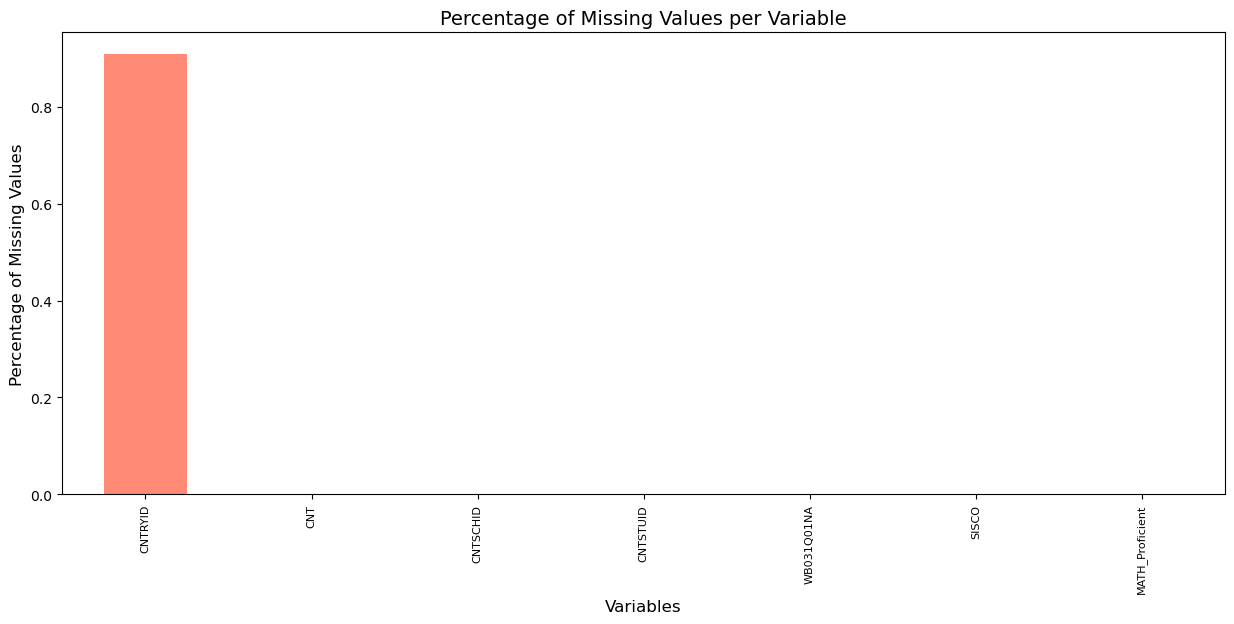

In [28]:
import matplotlib.pyplot as plt

# Calculate percentage of missing values
null_percentages = df_analysis.isnull().mean() * 100

# Sort by highest missing values
null_percentages = null_percentages.sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(15, 6))
null_percentages.plot(kind='bar', color='tomato', alpha=0.75)

# Formatting
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Percentage of Missing Values", fontsize=12)
plt.title("Percentage of Missing Values per Variable", fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate labels for readability

plt.show()

In [5]:
# Exclude 'CNT' column from the missing values calculation
missing_by_country = df_analysis.groupby("CNT").apply(lambda x: x.drop(columns=["CNT"]).isnull().mean() * 100)

# No need to droplevel since CNT is no longer included in the index
missing_by_country = missing_by_country.T  # Transpose for readability

# Save to CSV
csv_filename = "missing_values_by_country_v2.csv"
missing_by_country.to_csv(csv_filename, index=True)

print(f"✅ Missing values breakdown saved to {csv_filename}")


✅ Missing values breakdown saved to missing_values_by_country_v2.csv


/tmp/ipykernel_261/938655168.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = df_analysis.groupby("CNT").apply(lambda x: x.drop(columns=["CNT"]).isnull().mean() * 100)


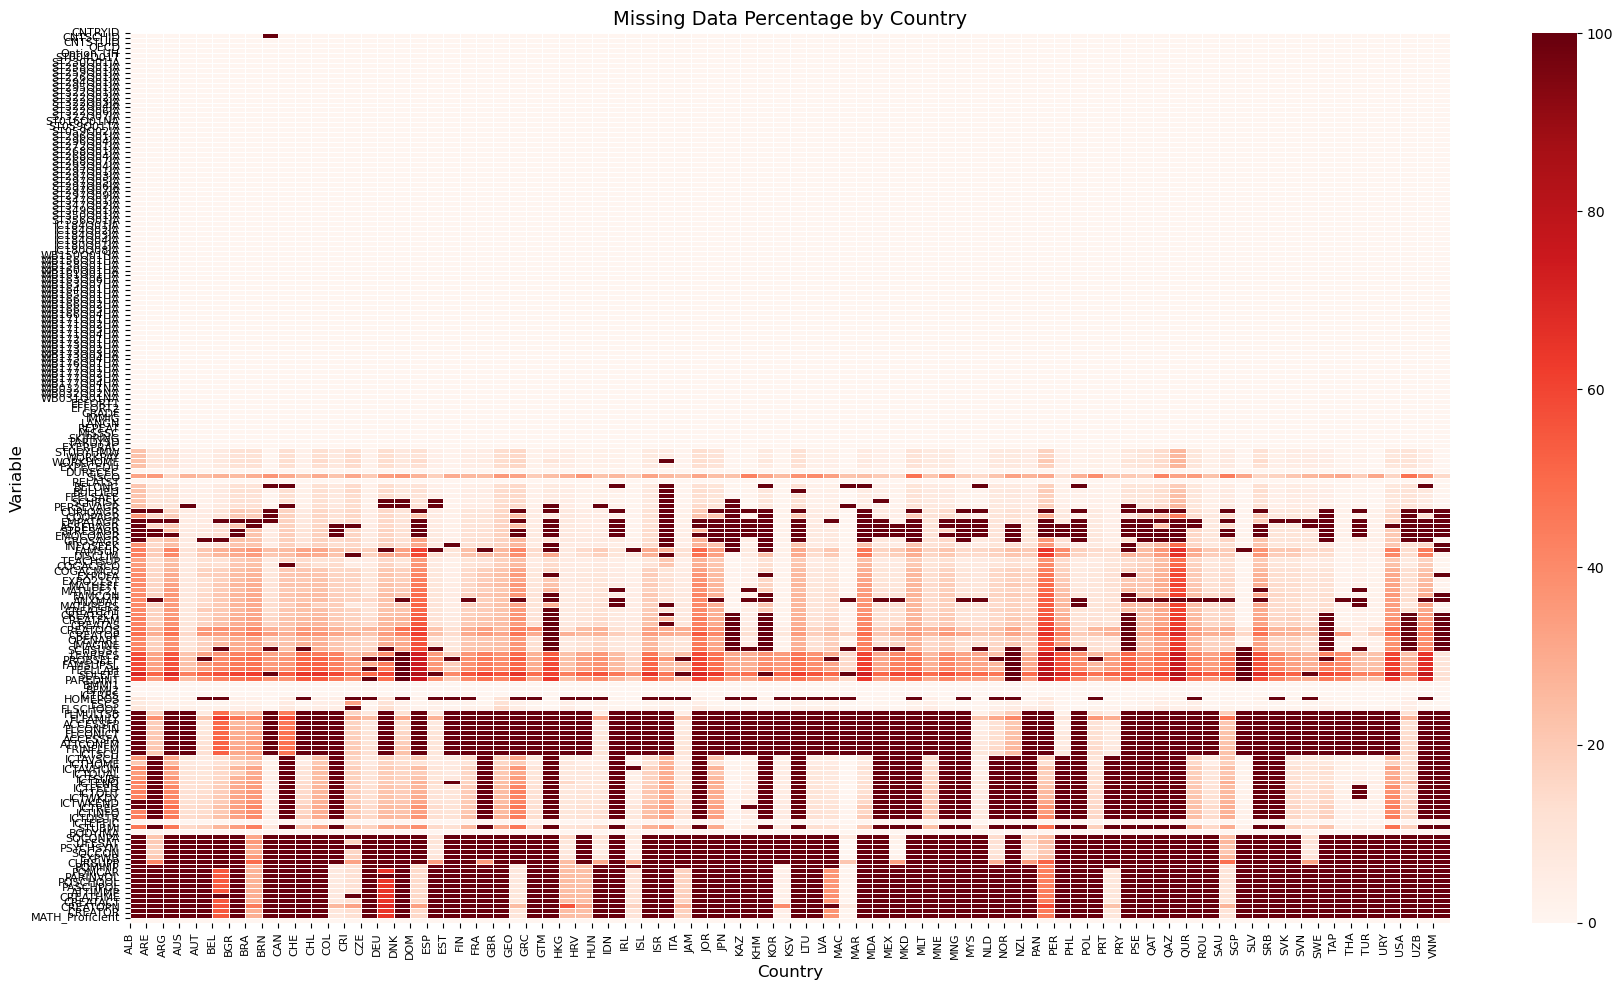

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
plt.figure(figsize=(18, 10))  # Increase figure size for better readability

ax = sns.heatmap(
    missing_by_country, 
    cmap="Reds", 
    annot=False, 
    linewidths=0.5, 
    cbar=True, 
    vmin=0, vmax=100
)

# Ensure all variables (y-axis) are displayed
ax.set_yticks(range(len(missing_by_country.index)))  # Set tick positions
ax.set_yticklabels(missing_by_country.index, fontsize=8)  # Adjust font size

# Ensure all countries (x-axis) are displayed
ax.set_xticks(range(len(missing_by_country.columns)))  # Set tick positions
ax.set_xticklabels(missing_by_country.columns, fontsize=8, rotation=90)  # Rotate labels for readability

# Formatting
plt.title("Missing Data Percentage by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Variable", fontsize=12)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()


In [7]:
# Find variables where more than 30% of values are missing globally
missing_threshold = 30  # Percentage threshold
variables_to_exclude = missing_by_country[missing_by_country.mean(axis=1) > missing_threshold].index.tolist()

# Print the variables with descriptions
print("🚨 Variables recommended for exclusion due to high missing rates:")
for var in variables_to_exclude:
    description = field_description_lookup.get(var, "No description available")  # Lookup description or fallback
    print(f"- {var} {description}")

🚨 Variables recommended for exclusion due to high missing rates:
- PERSEVAGR Perseverance (agreement) (WLE)
- COOPAGR Cooperation (agreement) (WLE)
- EMPATAGR Empathy (agreement) (WLE)
- ASSERAGR Assertiveness (agreement) (WLE)
- STRESAGR Stress resistance (agreement) (WLE)
- EMOCOAGR Emotional control (agreement) (WLE)
- INFOSEEK Information seeking about future careers (WLE)
- FAMCON Subjective familiarity with mathematics concepts (WLE)
- CREATAS Creative Activities at school (WLE)
- CREATOOS Creative Activities outside of school (WLE)
- IMAGINE Imagination and Adventurousness TBD (WLE)
- SCHSUST School actions/activities to sustain learning  (WLE)
- LEARRES Types of learning resources used while school was closed (WLE)
- PROBSELF Problems with self-directed learning (WLE)
- FAMSUPSL Family support for self-directed learning (WLE)
- FEELLAH Feelings about learning at home (WLE)
- SDLEFF Self-directed learning self-efficacy (WLE)
- ICTRES ICT Resources (WLE)
- FLSCHOOL Financial educ

In [8]:
# Find variables where more than 30% of values are missing globally
missing_threshold = 30  # Percentage threshold
variables_to_exclude = missing_by_country[missing_by_country.mean(axis=1) > missing_threshold].index.tolist()

# Print the variables with descriptions
print("🚨 Variables recommended for exclusion due to high missing rates:")
for var in variables_to_exclude:
    description = field_description_lookup.get(var, "No description available")  # Lookup description or fallback
    print(f"- {var}: {description}")


🚨 Variables recommended for exclusion due to high missing rates:
- PERSEVAGR: Perseverance (agreement) (WLE)
- COOPAGR: Cooperation (agreement) (WLE)
- EMPATAGR: Empathy (agreement) (WLE)
- ASSERAGR: Assertiveness (agreement) (WLE)
- STRESAGR: Stress resistance (agreement) (WLE)
- EMOCOAGR: Emotional control (agreement) (WLE)
- INFOSEEK: Information seeking about future careers (WLE)
- FAMCON: Subjective familiarity with mathematics concepts (WLE)
- CREATAS: Creative Activities at school (WLE)
- CREATOOS: Creative Activities outside of school (WLE)
- IMAGINE: Imagination and Adventurousness TBD (WLE)
- SCHSUST: School actions/activities to sustain learning  (WLE)
- LEARRES: Types of learning resources used while school was closed (WLE)
- PROBSELF: Problems with self-directed learning (WLE)
- FAMSUPSL: Family support for self-directed learning (WLE)
- FEELLAH: Feelings about learning at home (WLE)
- SDLEFF: Self-directed learning self-efficacy (WLE)
- ICTRES: ICT Resources (WLE)
- FLSCH

In [9]:
# Calculate the percentage of missing data per country
missing_percentage = missing_by_country.mean(axis=0)  # Mean missing percentage per country
data_completeness = 100 - missing_percentage  # Convert to completeness

# Sort countries by completeness
data_completeness_sorted = data_completeness.sort_values(ascending=False)

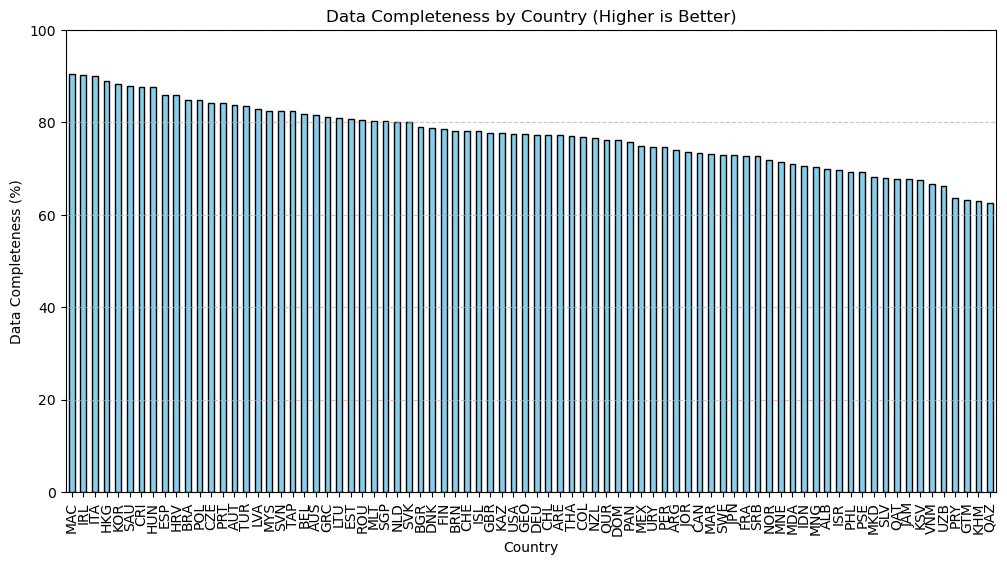

In [10]:
import matplotlib.pyplot as plt

# Plot the data completeness per country
plt.figure(figsize=(12, 6))
data_completeness_sorted.plot(kind="bar", color="skyblue", edgecolor="black")

# Formatting
plt.xlabel("Country")
plt.ylabel("Data Completeness (%)")
plt.title("Data Completeness by Country (Higher is Better)")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.ylim(0, 100)  # Ensure scale is from 0% to 100%
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [11]:
# Calculate the percentage of missing values per country
missing_percentage_by_country = missing_by_country.mean(axis=0)  # Mean missing % per country

# Filter countries where the missing percentage is <= 30%
countries_with_most_complete_data = missing_percentage_by_country[missing_percentage_by_country <= 35].index.tolist()

# Print the countries with the most complete data
print("🌍 Countries with the most complete data (≤ 30% missing across all variables):")
for country in countries_with_most_complete_data:
    print(f"- {country}")

🌍 Countries with the most complete data (≤ 30% missing across all variables):
- ALB
- ARE
- ARG
- AUS
- AUT
- BEL
- BGR
- BRA
- BRN
- CAN
- CHE
- CHL
- COL
- CRI
- CZE
- DEU
- DNK
- DOM
- ESP
- EST
- FIN
- FRA
- GBR
- GEO
- GRC
- HKG
- HRV
- HUN
- IDN
- IRL
- ISL
- ISR
- ITA
- JAM
- JOR
- JPN
- KAZ
- KOR
- KSV
- LTU
- LVA
- MAC
- MAR
- MDA
- MEX
- MKD
- MLT
- MNE
- MNG
- MYS
- NLD
- NOR
- NZL
- PAN
- PER
- PHL
- POL
- PRT
- PSE
- QAT
- QUR
- ROU
- SAU
- SGP
- SLV
- SRB
- SVK
- SVN
- SWE
- TAP
- THA
- TUR
- URY
- USA
- UZB
- VNM


In [12]:
# Calculate the percentage of missing data per country
missing_percentage = missing_by_country.mean(axis=0)  # Mean missing percentage per country
data_completeness = 100 - missing_percentage  # Convert to completeness

# Sort countries by completeness
data_completeness_sorted = data_completeness.sort_values(ascending=False)
data_completeness_sorted

CNT
MAC    90.507908
IRL    90.378584
ITA    90.136046
HKG    89.051784
KOR    88.330234
         ...    
UZB    66.230784
PRY    63.765626
GTM    63.225862
KHM    63.089074
QAZ    62.620754
Length: 80, dtype: float64

<Figure size 1500x600 with 0 Axes>

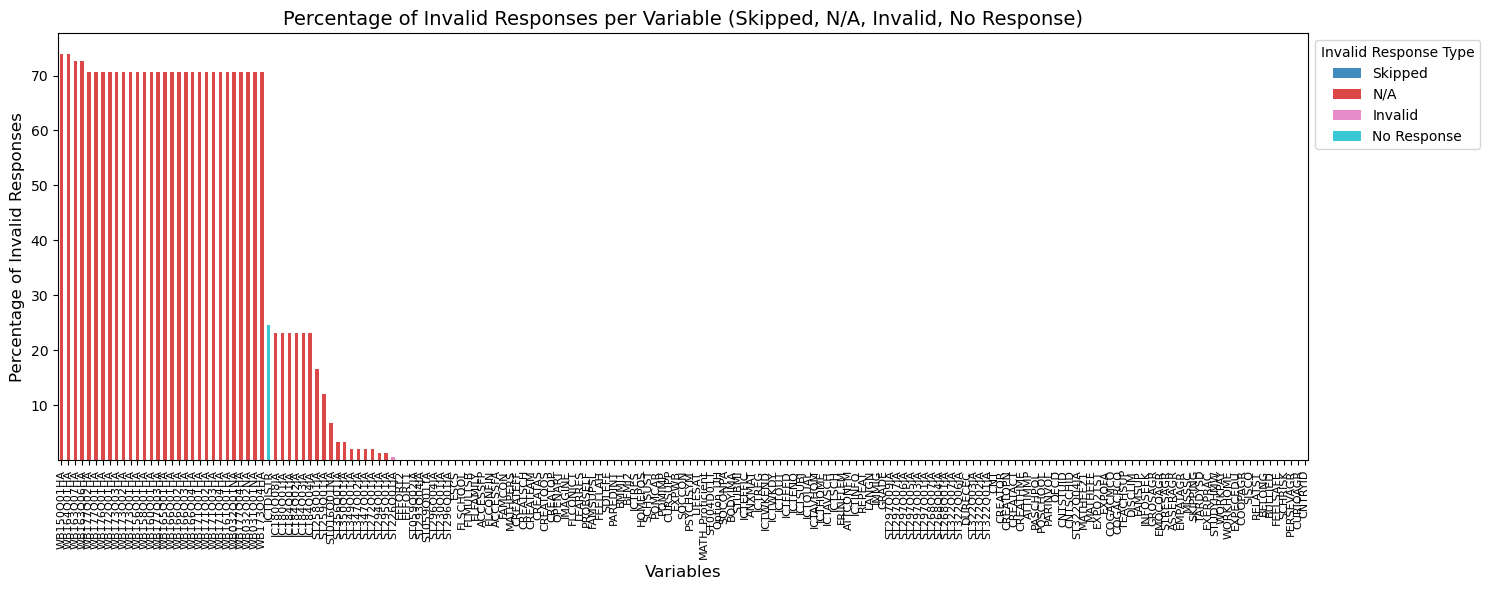

In [13]:
import matplotlib.pyplot as plt

# Define invalid values with their descriptions
invalid_values = {95: "Skipped", 97: "N/A", 98: "Invalid", 99: "No Response"}

# Calculate the percentage of each invalid value per column
invalid_counts = {desc: (df == val).mean() * 100 for val, desc in invalid_values.items()}

# Convert to DataFrame for plotting
invalid_df = pd.DataFrame(invalid_counts)

# Sort by total invalid percentage (descending)
invalid_df["Total Invalid %"] = invalid_df.sum(axis=1)
invalid_df = invalid_df.sort_values(by="Total Invalid %", ascending=False)

# Plot stacked bar chart
plt.figure(figsize=(15, 6))
invalid_df.drop(columns=["Total Invalid %"]).plot(kind='bar', stacked=True, figsize=(15, 6), colormap="tab10", alpha=0.85)

# Formatting
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Percentage of Invalid Responses", fontsize=12)
plt.title("Percentage of Invalid Responses per Variable (Skipped, N/A, Invalid, No Response)", fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate labels for readability
plt.legend(title="Invalid Response Type", bbox_to_anchor=(1, 1), loc="upper left")  # Move legend outside

plt.tight_layout()
plt.show()


In [14]:

# Check for missing values
print("\nMissing Values:")
print(df_analysis.isnull().sum())

# Select only numeric columns for correlation analysis
numeric_cols = df_analysis.select_dtypes(include=['number']).columns



Missing Values:
CNT                     0
CNTRYID              5576
CNTSCHID                0
CNTSTUID                0
OECD                    0
                    ...  
CREATHME           523865
CREATACT           543762
CREATOPN           524256
CREATOR            524006
MATH_Proficient         0
Length: 181, dtype: int64


# Solving for Simpsons Paradox!

In [15]:
# List to store per-country correlation matrices
country_correlation_matrices = []

# Compute correlation matrices for each country
for country, group in df_analysis.groupby("CNT"):
    country_corr_matrix = group[numeric_cols].corr()  # Full correlation matrix
    country_correlation_matrices.append(country_corr_matrix)

# Convert list to 3D numpy array (stacking matrices)
correlation_tensor = np.stack([df.values for df in country_correlation_matrices], axis=2)

# Compute the mean correlation across countries (element-wise)
average_correlation_matrix = np.nanmean(correlation_tensor, axis=2)  # Averaging along country axis

# Convert back to a DataFrame
average_correlation_df = pd.DataFrame(average_correlation_matrix, index=numeric_cols, columns=numeric_cols)


/tmp/ipykernel_261/14161121.py:13: RuntimeWarning: Mean of empty slice
  average_correlation_matrix = np.nanmean(correlation_tensor, axis=2)  # Averaging along country axis


In [16]:
average_correlation_df.shape

(107, 107)

# Original Correlation (Not Averaging By Country)

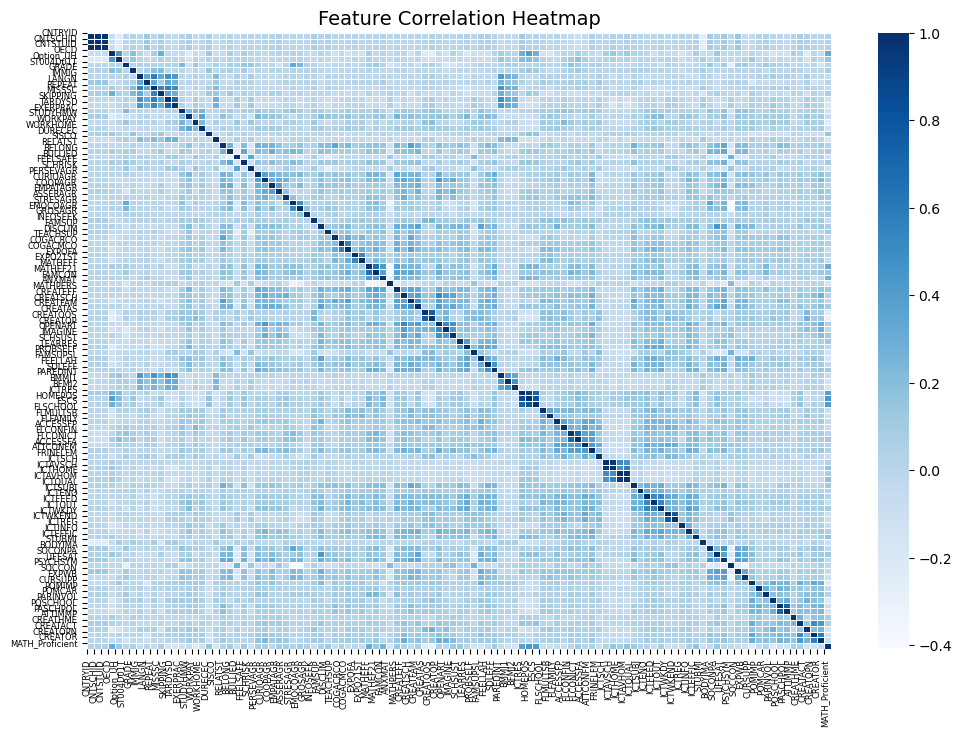

In [17]:
# Plot correlation heatmap only for numeric variables
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    df_analysis[numeric_cols].corr(),
    cmap='Blues',
    annot=False,
    linewidths=0.5
)

# Adjust font sizes and rotation for readability
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(fontsize=8, rotation=90)  # Rotate x-axis labels
plt.yticks(fontsize=8, rotation=0)   # Rotate y-axis labels

# Force every label to be shown
plt.gca().set_xticks(range(len(numeric_cols)))  # Set x-ticks
plt.gca().set_xticklabels(numeric_cols, fontsize=6, rotation=90)  # Force labels
plt.gca().set_yticks(range(len(numeric_cols)))  # Set y-ticks
plt.gca().set_yticklabels(numeric_cols, fontsize=6, rotation=0)  # Force labels

plt.show()

# Now Averaging By Country

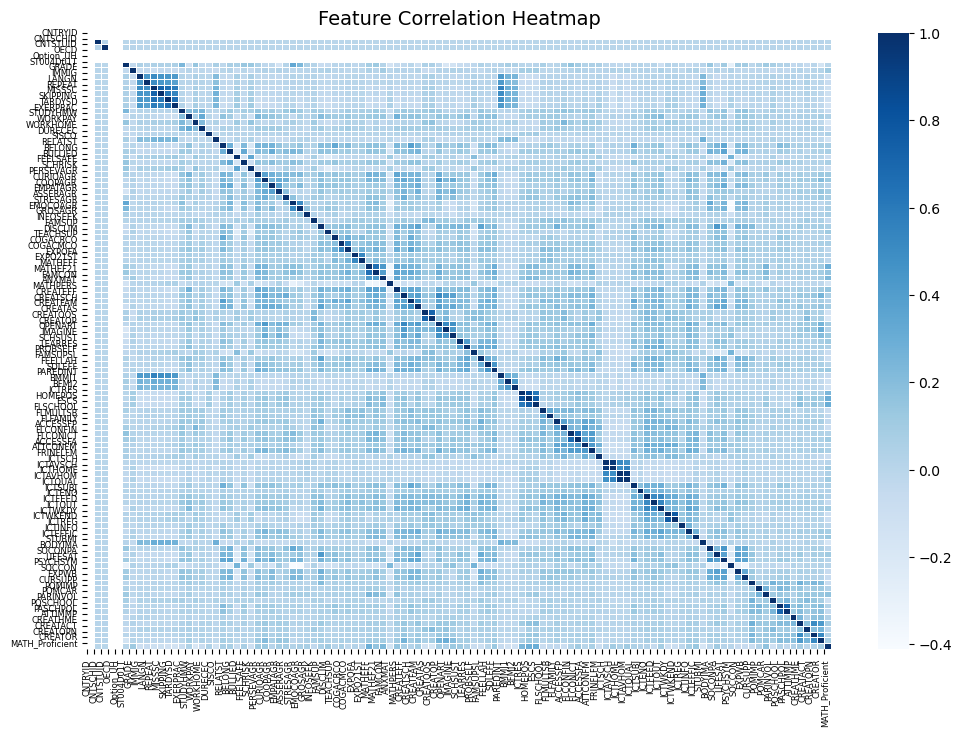

In [18]:
# Plot correlation heatmap only for numeric variables
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    average_correlation_df,
    cmap='Blues',
    annot=False,
    linewidths=0.5
)

# Adjust font sizes and rotation for readability
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(fontsize=8, rotation=90)  # Rotate x-axis labels
plt.yticks(fontsize=8, rotation=0)   # Rotate y-axis labels

# Force every label to be shown
plt.gca().set_xticks(range(len(numeric_cols)))  # Set x-ticks
plt.gca().set_xticklabels(numeric_cols, fontsize=6, rotation=90)  # Force labels
plt.gca().set_yticks(range(len(numeric_cols)))  # Set y-ticks
plt.gca().set_yticklabels(numeric_cols, fontsize=6, rotation=0)  # Force labels

plt.show()


# Without Averaging - Top Negative Correlations


Top Negative Correlations with MATH_Proficient:
Creative Activities outside of school (WLE)                    -0.304112
Current Parental/guardian Support (WLE)                        -0.244007
Working for pay before or after school                         -0.238678
Creative Activities at school (WLE)                            -0.233179
Parental Involvement (WLE)                                     -0.212553
Clear idea about future job                                    -0.192500
Arriving late for school stricter definition                   -0.174493
Mathematics Anxiety (WLE)                                      -0.173397
Family support for self-directed learning (WLE)                -0.159628
Participation in creative activities outside of school (WLE)   -0.158474
Name: MATH_Proficient, dtype: float64


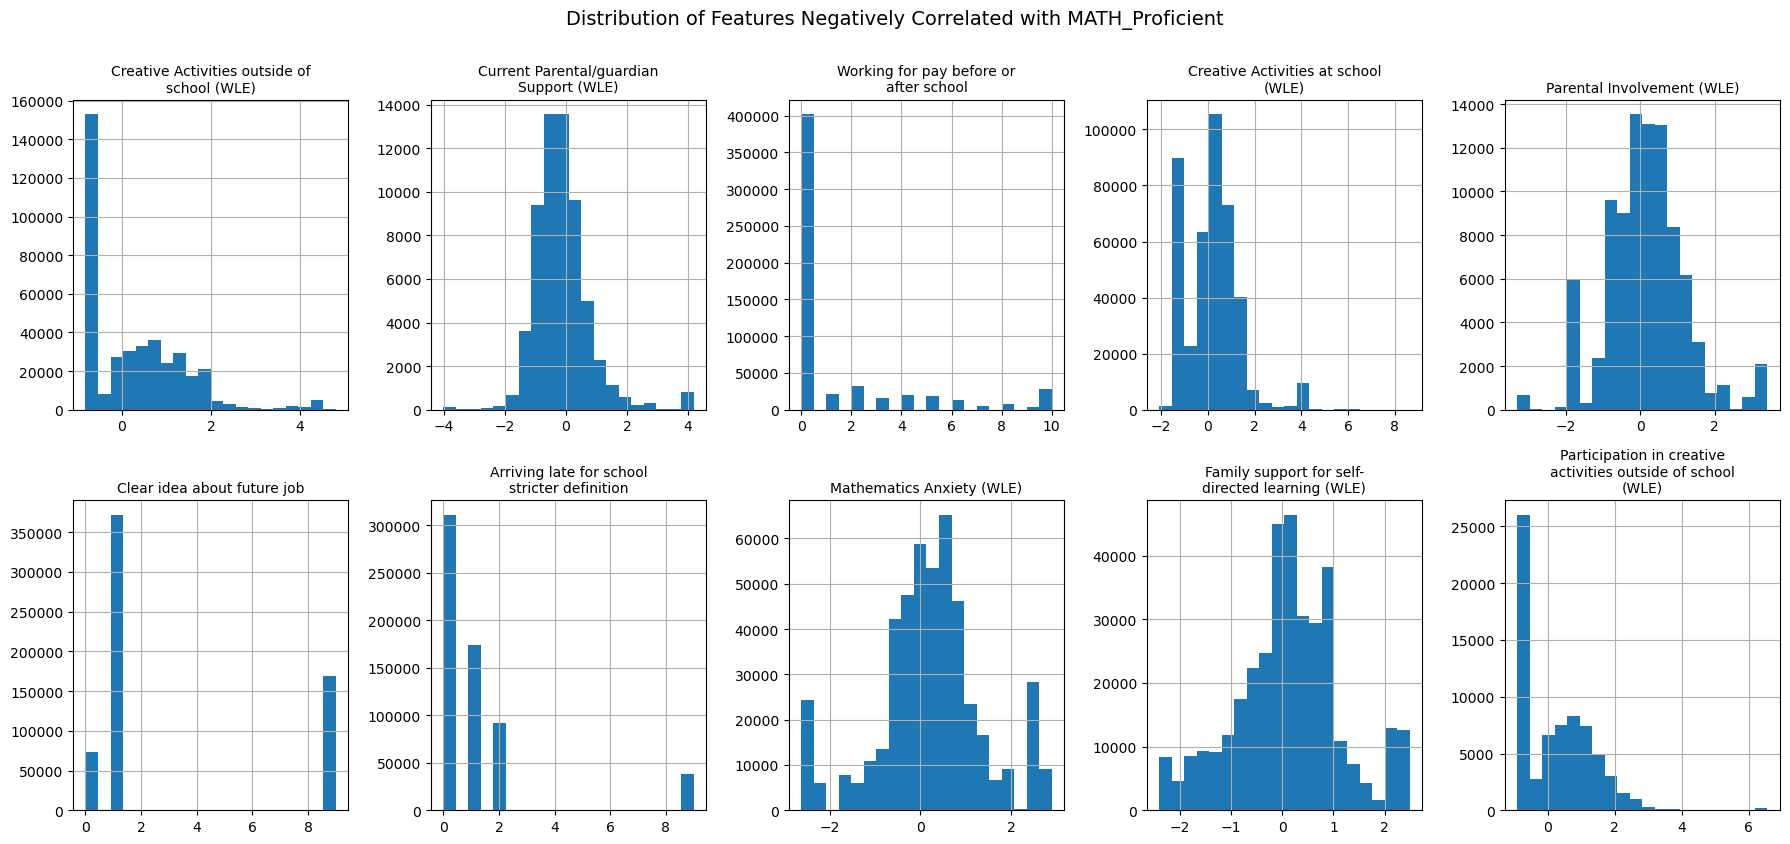

In [19]:
import textwrap

# Analyze correlation with MATH_Proficient
correlations = df_analysis[numeric_cols].corr()["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Negative Correlations with MATH_Proficient:")
print(correlations_named.head(10))

# Get top 10 negatively correlated features
top_negative = correlations.head(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_negative}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_negative):
    ax = axes[i]
    df_analysis[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Negatively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()



# WITH Averaging - Top Negative Correlations


Top Negative Correlations with MATH_Proficient:
Working for pay before or after school                                  -0.192860
Creative Activities outside of school (WLE)                             -0.188116
Body Mass Index (BMI)                                                   -0.180865
Mathematics Anxiety (WLE)                                               -0.153937
Creative Activities at school (WLE)                                     -0.146111
Arriving late for school stricter definition                            -0.145884
Clear idea about future job                                             -0.143325
Father’s occupational status (ISEI) based on 4-digit human coded ISCO   -0.139085
Parental Involvement (WLE)                                              -0.127256
Skipping classes or days of school                                      -0.124286
Name: MATH_Proficient, dtype: float64


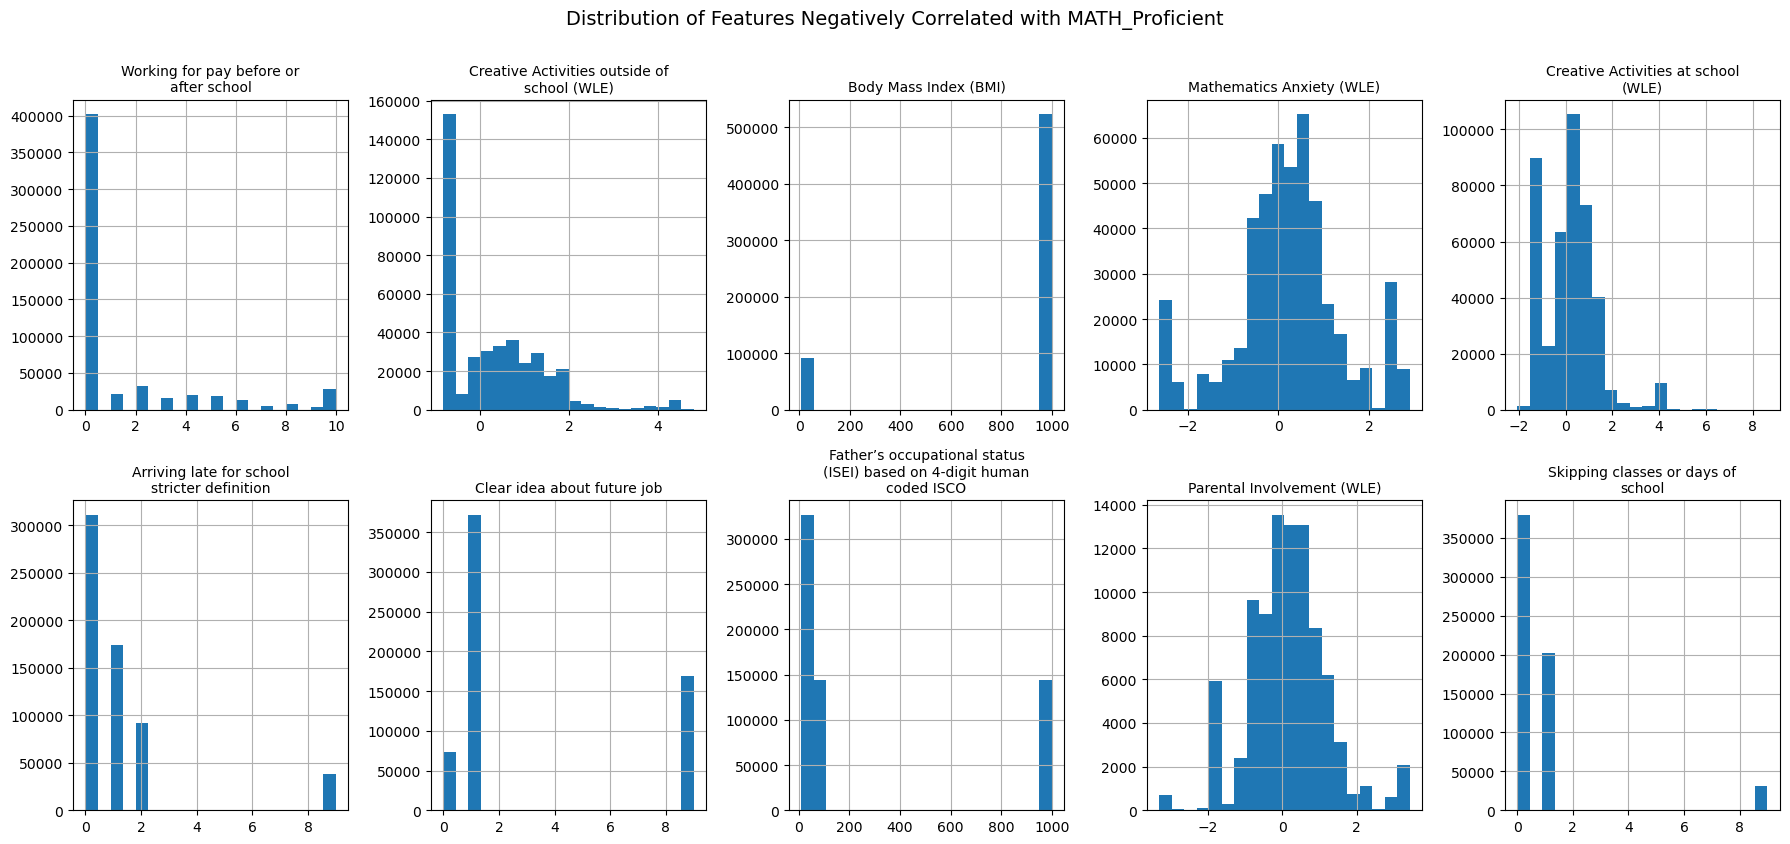

In [20]:
import textwrap

# Analyze correlation with MATH_Proficient
correlations = average_correlation_df["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Negative Correlations with MATH_Proficient:")
print(correlations_named.head(10))

# Get top 10 negatively correlated features
top_negative = correlations.head(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_negative}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_negative):
    ax = axes[i]
    df_analysis[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Negatively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()


# Without Averaging - Top Positive Correlations


Top Positive Correlations with MATH_Proficient:
Availability and Usage of ICT at School                                                                0.152734
Self-efficacy in digital competencies (WLE)                                                            0.159240
Availability and Usage of ICT at Home                                                                  0.168179
Subjective familiarity with mathematics concepts (WLE)                                                 0.258798
OECD country                                                                                           0.311916
Mathematics self-efficacy: formal and applied mathematics - response options reversed in 2022 (WLE)    0.313869
ICT Resources (WLE)                                                                                    0.375823
Index of economic, social and cultural status                                                          0.407717
Home possessions (WLE)                                 

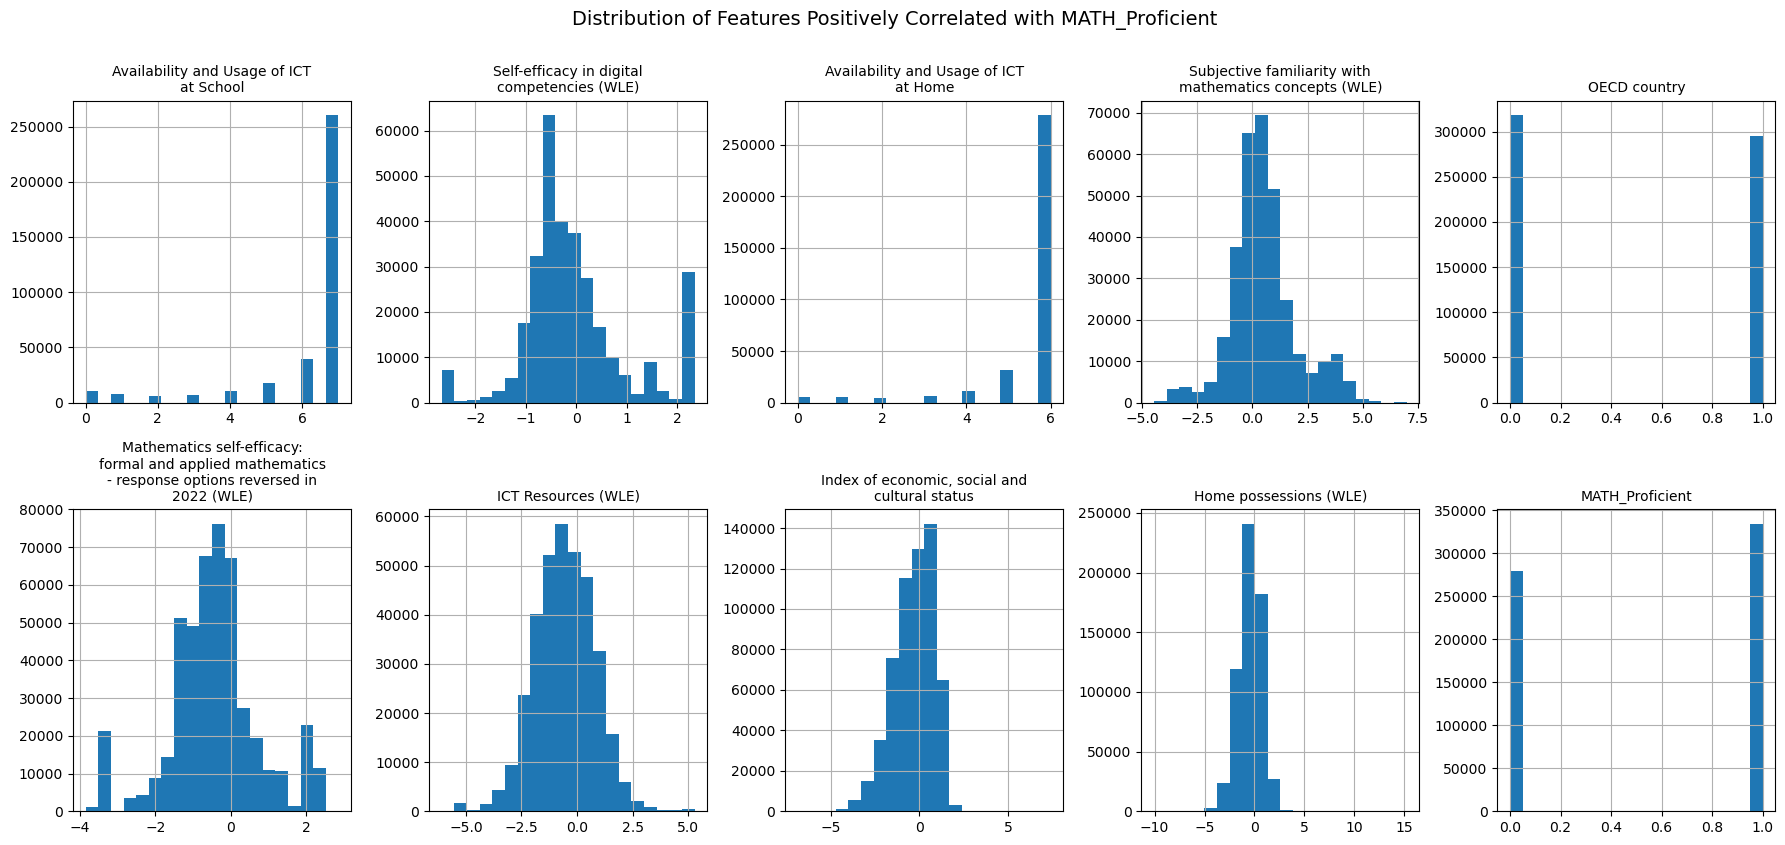

In [21]:
import textwrap

# Analyze correlation with MATH_Proficient
correlations = df_analysis[numeric_cols].corr()["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Positive Correlations with MATH_Proficient:")
print(correlations_named.tail(10))

# Get top 10 positively correlated features
top_positive = correlations.tail(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_positive}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_positive):
    ax = axes[i]
    df_analysis[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Positively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()

# WITH Averaging - Top Positive Correlations


Top Positive Correlations with MATH_Proficient:
Mathematics Career (WLE)                                                                               0.164882
Subjective familiarity with mathematics concepts (WLE)                                                 0.227871
ICT Resources (WLE)                                                                                    0.238842
Mathematics self-efficacy: formal and applied mathematics - response options reversed in 2022 (WLE)    0.285172
Home possessions (WLE)                                                                                 0.292171
Index of economic, social and cultural status                                                          0.297262
MATH_Proficient                                                                                        1.000000
Country Identifier                                                                                          NaN
OECD country                                           

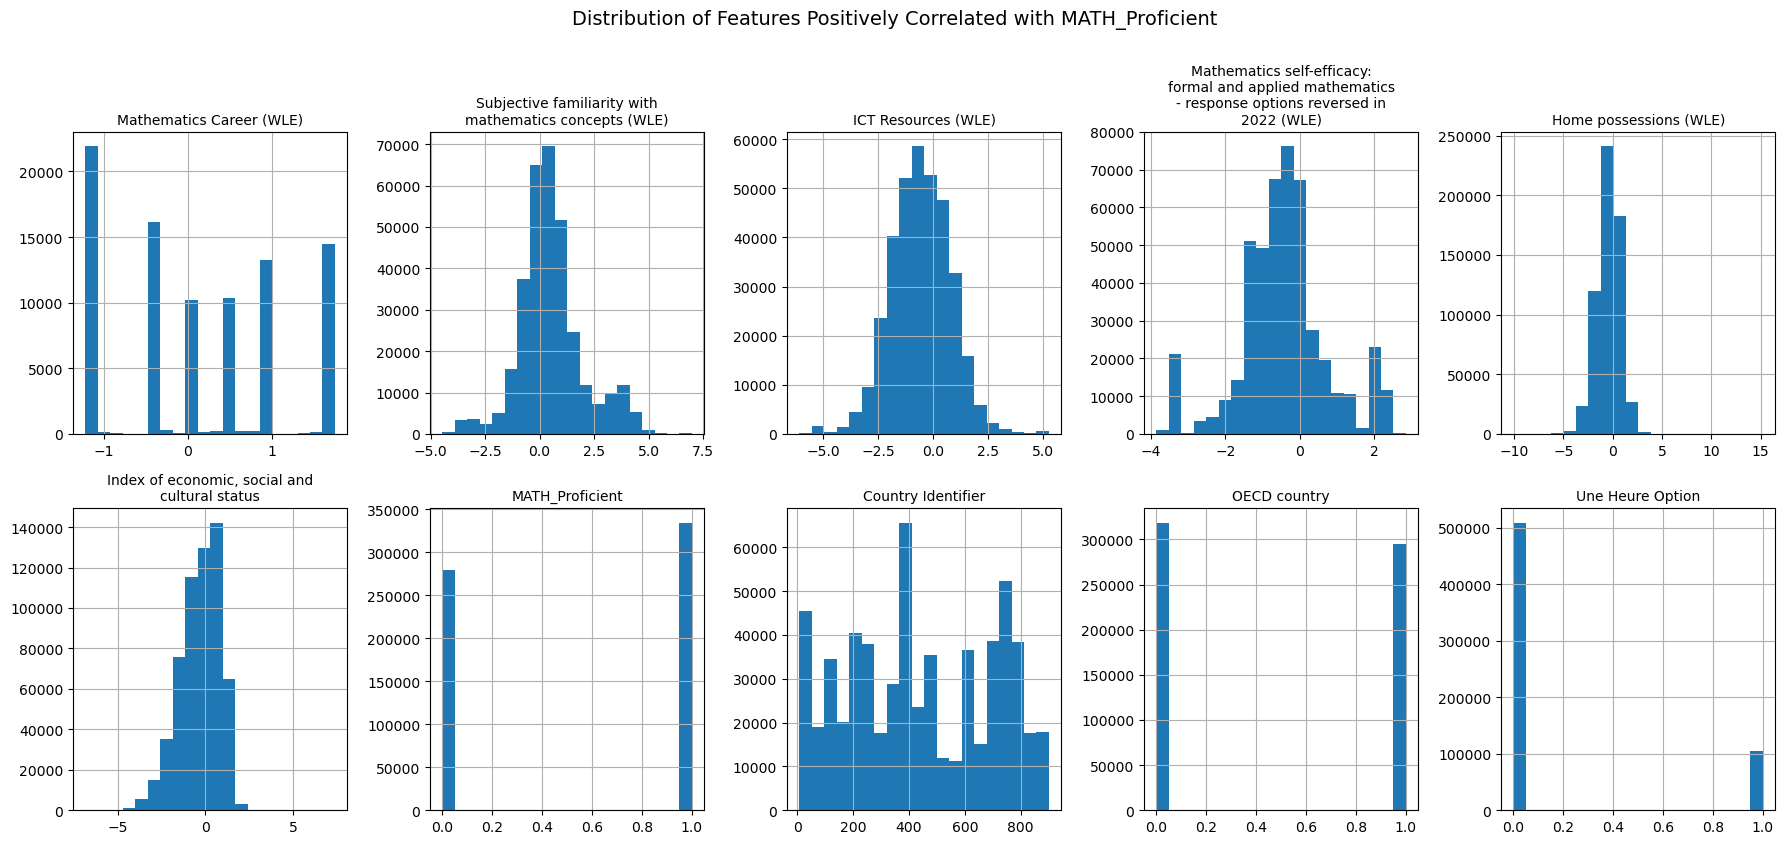

In [22]:
import textwrap

# Analyze correlation with MATH_Proficient
correlations = average_correlation_df["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Positive Correlations with MATH_Proficient:")
print(correlations_named.tail(10))

# Get top 10 positively correlated features
top_positive = correlations.tail(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_positive}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_positive):
    ax = axes[i]
    df_analysis[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Positively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()

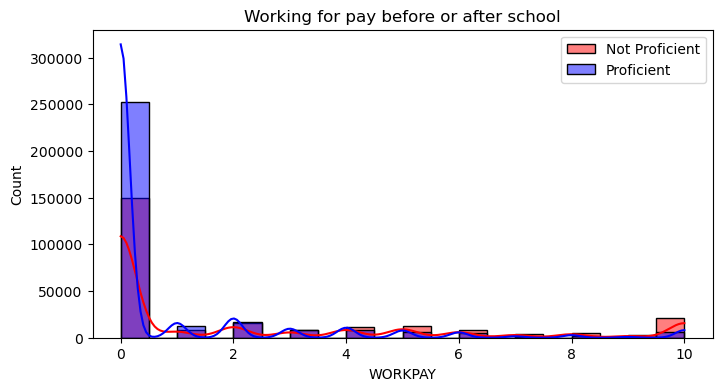

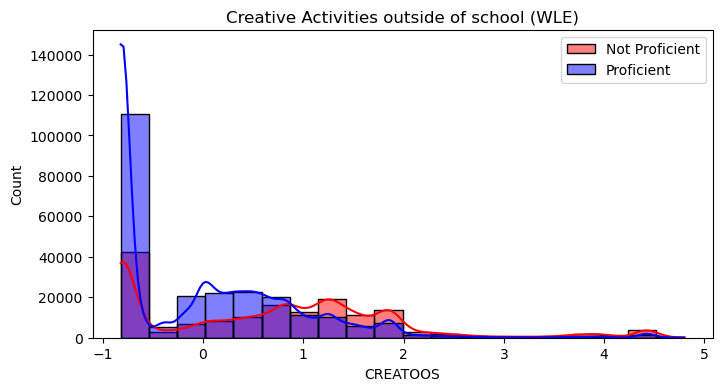

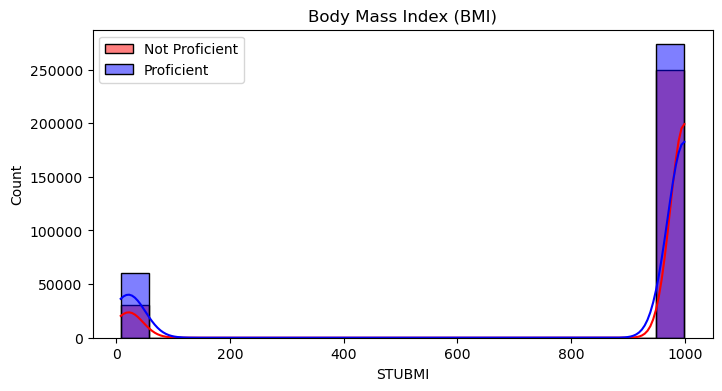

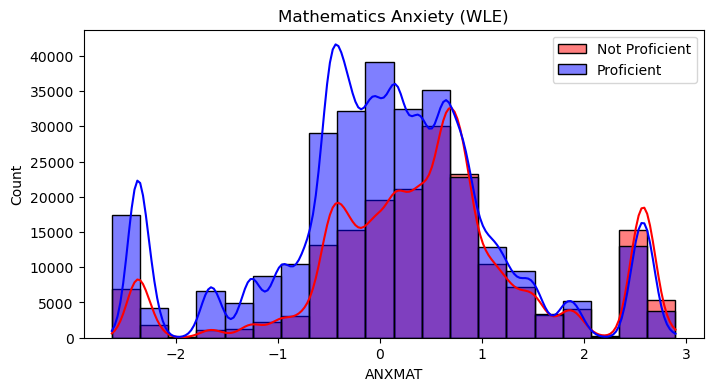

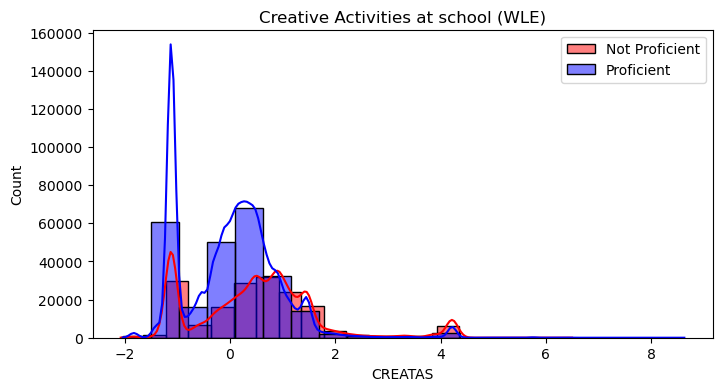

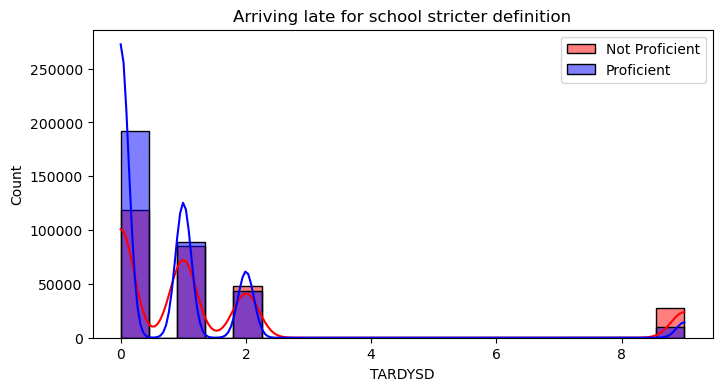

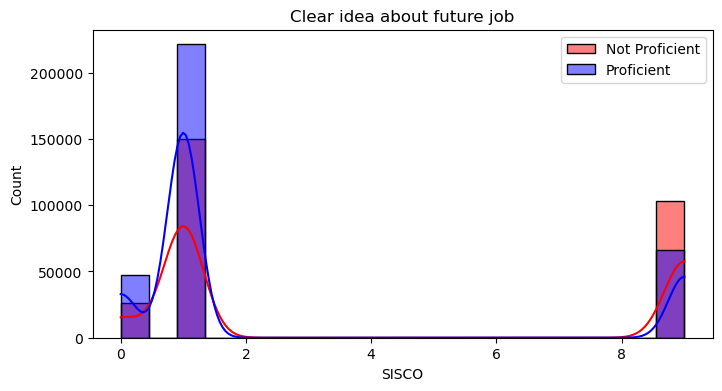

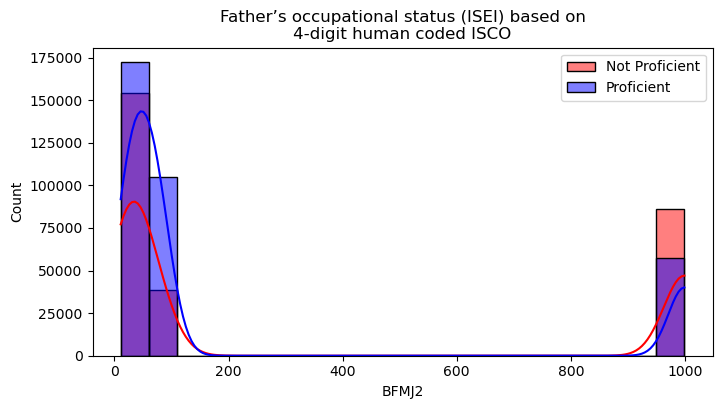

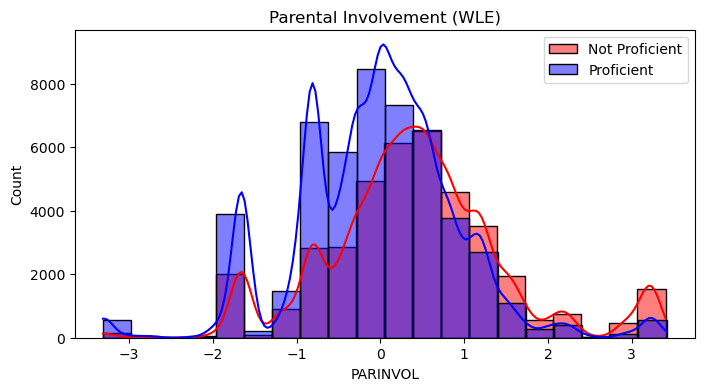

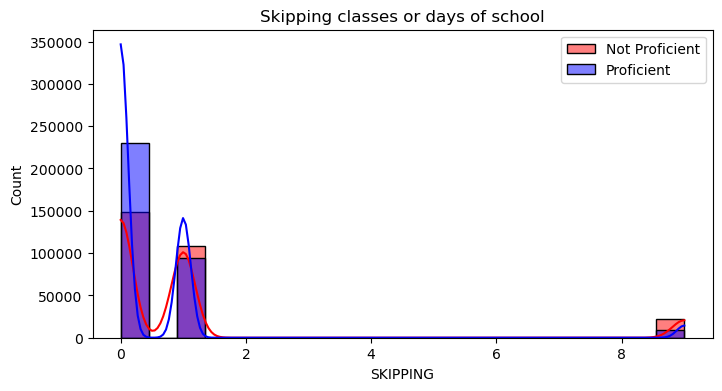

In [23]:
for col in top_negative:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_analysis[df_analysis["MATH_Proficient"] == 0][col], color="red", label="Not Proficient", kde=True, bins=20)
    sns.histplot(df_analysis[df_analysis["MATH_Proficient"] == 1][col], color="blue", label="Proficient", kde=True, bins=20)

    wrapped_title = "\n".join(textwrap.wrap(field_description_lookup.get(col, col), width=50))
    plt.title(wrapped_title)
    plt.legend()
    plt.show()

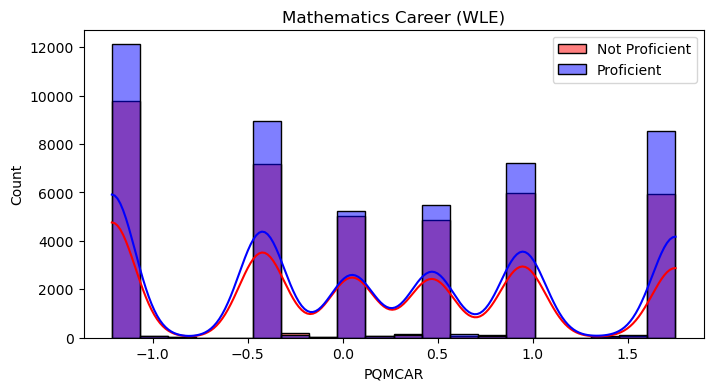

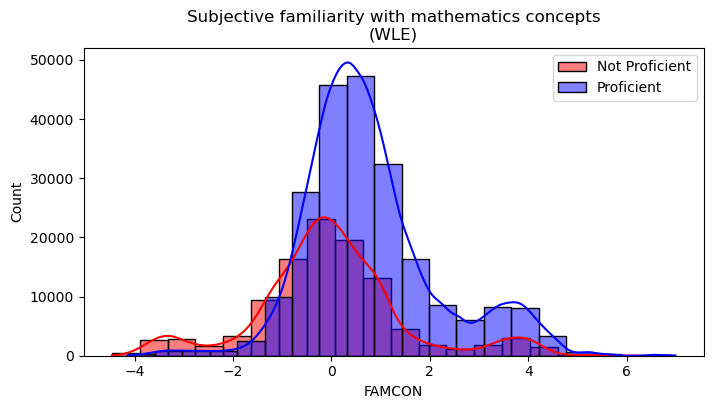

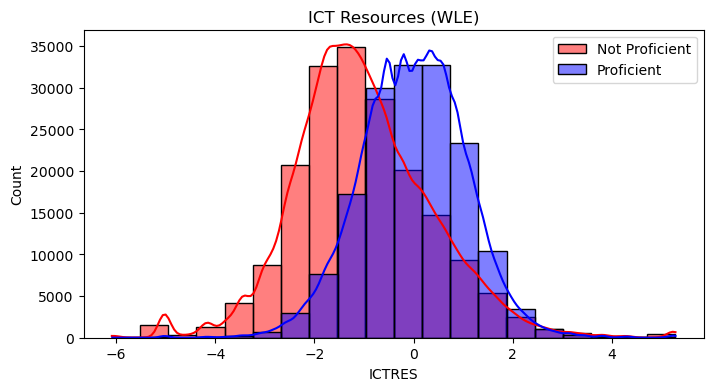

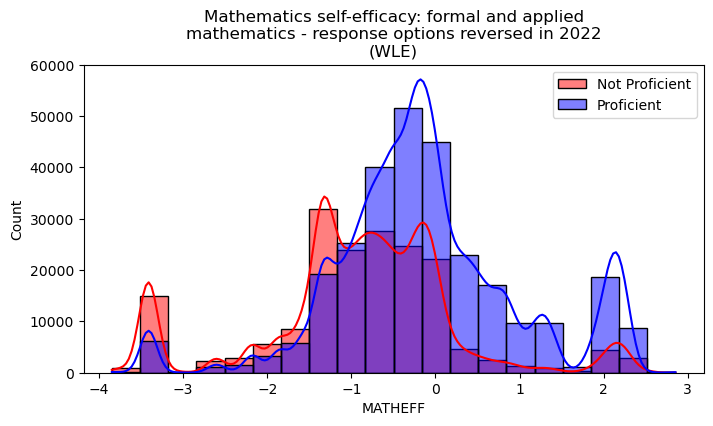

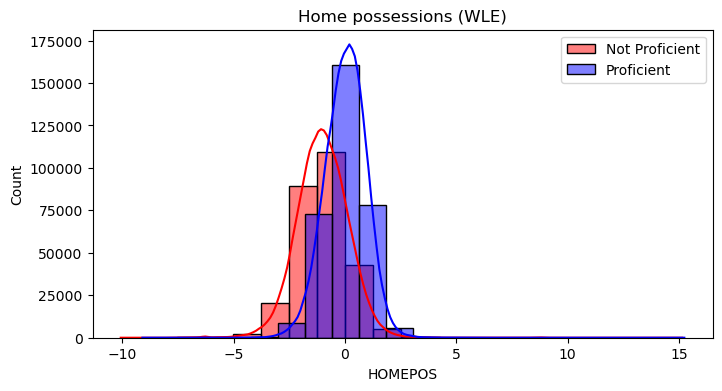

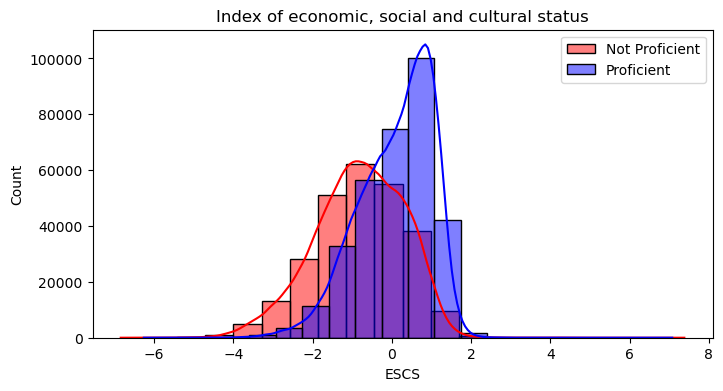

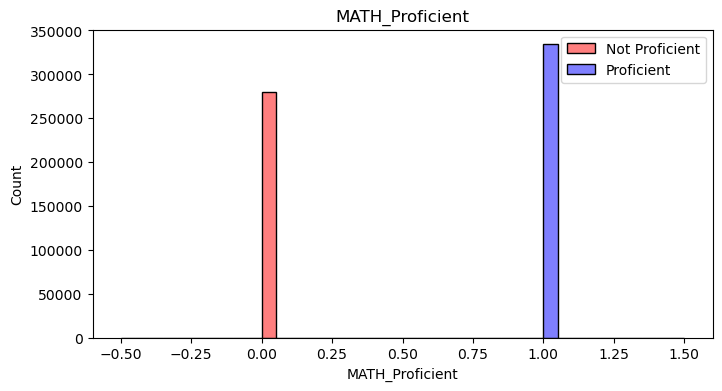

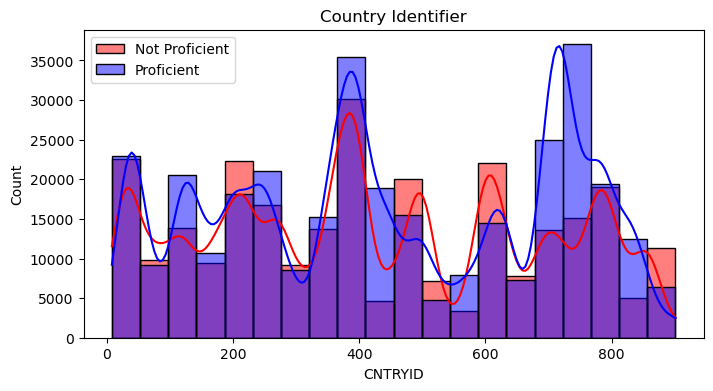

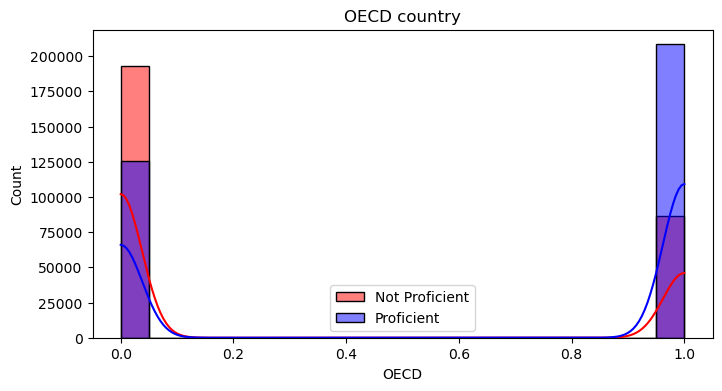

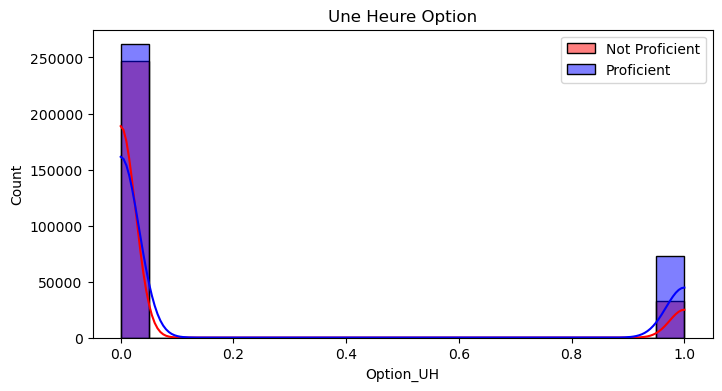

In [24]:
for col in top_positive:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_analysis[df_analysis["MATH_Proficient"] == 0][col], color="red", label="Not Proficient", kde=True, bins=20)
    sns.histplot(df_analysis[df_analysis["MATH_Proficient"] == 1][col], color="blue", label="Proficient", kde=True, bins=20)

    wrapped_title = "\n".join(textwrap.wrap(field_description_lookup.get(col, col), width=50))
    plt.title(wrapped_title)
    plt.legend()
    plt.show()